# **Sprint 3 Mini Project**


## Sprint 학습 목표

- 선형대수의 기본 개념(scalar, vector, matrix)과 그 필요성을 이해할 수 있다.
- 머신러닝의 지도학습과 비지도학습의 차이점을 이해할 수 있다.
  - 비지도학습의 종류인 차원축소와 클러스터링을 목적에 맞게 진행할 수 있다.

## Project 문제 정의

### 배경

> 여러분은 국제 NGO 기구에서 데이터 분석 업무를 담당하고 있습니다. 현재 해당 NGO에서는 확보한 자금을 효과적으로 사용하기 위해 논의 중입니다. 진행 중인 의사결정 중 가장 중요한 것은 **가장 도움이 필요한 국가**를 선정하는 것입니다. 따라서 여러분은 주어진 데이터의 국가들의 기본 건강 정보 및 사회적 경제적 정보를 바탕으로 국가 내의 발전 정도를 파악하여, 어느 국가에 가장 먼저 도움을 줄 것인지에 대한 인사이트를 도출하는 업무를 맡게 되었습니다.

### Project 목표

- 국가별로 전반적인 소득, 생활, 경제 상황을 확인하고 군집화를 수행한다.
- 어떤 국가에 우선적으로 집중하여 자금을 줄 것인지에 대한 인사이트를 도출한다. 

## **N131 - Linear Algebra**

### 오늘의 목표
- Vector, Matrix 연산을 통해 필요한 정보를 도출할 수 있다.
- 선형 독립과 선형 종속의 의미를 이해할 수 있다.


### `Topic 1`: 데이터셋 전처리
> 본격적으로 Project를 진행하기 위해 데이터셋을 불러와 전처리를 진행해봅시다.

<br>

🚨 **data description**
> 국가별 사회-경제적 지표 및 기본 건강 지표

- `country`: 국가명

- `child_mort`: 5세 미만 영유아 사망률 (1000명 당)

- `exports`: 전체 GDP 대비 수출 비율 (상품 및 서비스)

- `health`: 전체 GDP 대비 의료 관련 총 소비율

- `imports`: 전체 GDP 대비 수입 비율 (상품 및 서비스)

- `Income`: 1인당 순 이익

- `Inflation`: 인플레이션율

- `life_expec`: 기대수명

- `total_fer`: 합계출산율

- `gdpp`: 1인당 GDP




#### **1-1. pandas의 `read_csv` 함수를 활용하여 주어진 csv 파일을 `aid`라는 이름으로 불러오세요.**

In [ ]:
import pandas as pd
aid = pd.read_csv("country.csv")
aid.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### **1-2. `aid`에 대해 품질의 문제와 구조적 문제가 있는지 확인 후 있다면 해결하세요.**

In [ ]:
# 결측치 없음
aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# 중복값 없음
aid.duplicated().sum()

0

In [ ]:
aid.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# 167개 국가의 정보가 담겨있는 데이터
# 국가별로 1개의 관측치만 존재
aid.describe(exclude='number')

,country
count,167
unique,167
top,Afghanistan
freq,1


### `Topic 2`: Vector & Matrix 연산
> 위에서 전처리를 마친 `aid`를 활용하여 연산을 진행해봅시다.



#### **2-1. 좌표 평면 상에서 3 국가 간의 거리를 측정하여 어떤 국가 간의 거리가 가장 짧은지 구해보세요.**
- `aid` 내 index가 2,4,6인 국가를 추출하세요.
- 해당 국가들의 데이터를 가지고 exports와 imports를 각각 x축, y축으로 하는 scatterplot을 그려보세요.
- 국가들 간의 거리를 Vector의 길이 공식을 활용하여 계산해보세요.
  - $||v|| = \sqrt{a^2 + b^2 + c^2 + \cdots}$

In [ ]:
# aid 내 index가 2,4,6인 국가를 추출
distance_aid = aid.loc[[2, 4, 6]]
distance_aid

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220


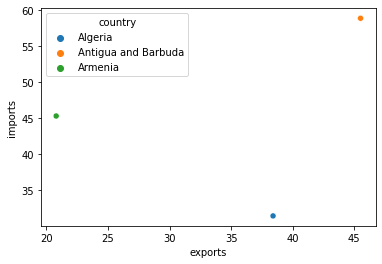

In [ ]:
# exports와 imports를 각각 x축, y축으로 하는 scatterplot
import seaborn as sns
sns.scatterplot(x='exports', y='imports', data=distance_aid, hue='country');

In [ ]:
# 두 벡터 사이의 거리를 구하는 공식
# 피타고라스 정리: (a**2 + b**2) = c**2

def vector_distance_formula(vector1, vector2):
  x_distance_square = (max(vector1) - min(vector1)) ** 2
  y_distance_square = (max(vector2) - min(vector2)) ** 2
  return (x_distance_square + y_distance_square) ** 0.5

In [ ]:
# 나라별 벡터 거리 연산
def distance_between_countries(df):
  countries = df.country.unique().tolist()
  vector1 = df.exports.tolist()
  vector2 = df.imports.tolist()
  return countries, round(vector_distance_formula(vector1, vector2), 2)

In [ ]:
print(distance_between_countries(aid.loc[[2, 4]]))
print(distance_between_countries(aid.loc[[4, 6]]))
print(distance_between_countries(aid.loc[[2, 6]]))

(['Algeria', 'Antigua and Barbuda'], 28.4)
(['Antigua and Barbuda', 'Armenia'], 28.2)
(['Algeria', 'Armenia'], 22.43)


#### **2-2. 행렬곱을 사용하여 10개 국의 총 임금의 합을 계산해보세요.**
- `aid` 내 index가 0~9인 국가를 추출하세요.
- 해당 국가들의 국민 수는 각각 [10, 20, 30, 20, 10, 50, 30, 20, 10, 40] 이라고 가정한 후, `income`과 국민 수를 활용하여 10개 국 전체의 임금 합을 계산하세요.
- for loop을 사용하여 해당 수식을 구현했을 때와 비교했을 때 어떤 것이 더 효율적인지 확인해보셔도 좋습니다.

In [ ]:
matmul_aid = aid.loc[[i for i in range(0, 10)]] # List Comprehension
matmul_aid["population"] = [10, 20, 30, 20, 10, 50, 30, 20, 10, 40] 
matmul_aid

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,population
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,10
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,20
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,30
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,20
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,10
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,50
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,30
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,20
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,10
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,40


In [ ]:
# income: Net income per person
all_country_income = sum(matmul_aid["income"] * matmul_aid["population"])
all_country_income

3946700

In [ ]:
import numpy as np

# 라이브러리로 검토
all_country_income == np.dot(matmul_aid.income, matmul_aid.population), \
all_country_income == np.matmul(matmul_aid.income, matmul_aid.population)

(True, True)

### `Topic 3`: 선형 종속, 선형 독립




#### **3-1. '두 벡터가 선형 종속 관계에 있다' 라는 말이 어떤 의미인지 설명해보세요.**
- 선형 종속과 선형 독립의 의미를 생각해보세요.
- 선형 종속인 두 벡터를 2차원 평면에 나타내면 어떻게 표현이 되는지, 시각화를 통해 이해해보셔도 좋습니다.

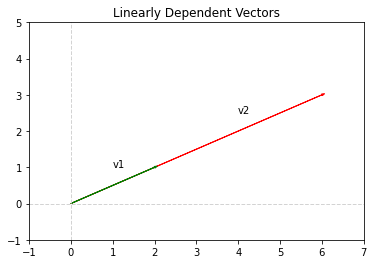

In [ ]:
import matplotlib.pyplot as plt

v1 = [2, 1]
v2 = np.multiply(3, v1) # v2벡터는 v1 벡터를 3배만큼 늘린 벡터

plt.xlim(-1,7)
plt.ylim(-1,5)

plt.axhline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)
plt.axvline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)
plt.arrow(0, 0, v2[0], v2[1], head_width=0.05, color='r')
plt.text(4, 2.5, 'v2')
plt.arrow(0, 0, v1[0], v1[1], head_width=0.05, color='g')
plt.text(1, 1, 'v1')
plt.title('Linearly Dependent Vectors')
plt.show()

In [ ]:
# 2개의 행벡터로 구성된 매트릭스는 2차원 공간의 span을 생성할 수 있어야 한다.
# 두 개의 벡터가 선형 종속일 경우 2차원이 아닌 1차원 선상에 존재하게 된다.
np.linalg.matrix_rank(np.array([v1, v2]))

1

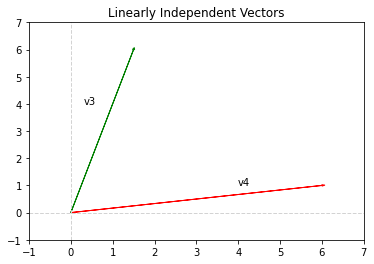

In [ ]:
v3 = [1.5, 6]
v4 = [6, 1]

plt.xlim(-1,7)
plt.ylim(-1,7)

plt.axhline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)
plt.axvline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)
plt.arrow(0, 0, v4[0], v4[1], head_width=0.05, color='r')
plt.text(4, 1, 'v4')
plt.arrow(0, 0, v3[0], v3[1], head_width=0.05, color='g')
plt.text(0.3, 4, 'v3')
plt.title('Linearly Independent Vectors')
plt.show()

In [ ]:
# 두 개의 벡터가 선형 독립이기 때문에 벡터의 개수와 동일한 {2}차원 평면의 span이 된다.
np.linalg.matrix_rank(np.array([v3, v4]))

2

💡 **해설 Tip)**

**선형 종속**
> 벡터와 동일한 벡터의 선형 결합이 존재하는 경우, 하나의 벡터가 다른 하나의 span 위에 종속 되어있다고 한다.

**선형 독립**
> 벡터와 동일한 벡터의 선형 조합이 존재하지 않는 경우, 벡터의 수 만큼 공간(span)을 생성할 수 있다.



* 두 벡터가 선형 종속 관계에 있는 경우 벡터 공간의 차원의 수는 벡터의 수보다 적다.

  * 두 벡터가 같은 선상에 존재하기 때문에 평면(2차원)이 아닌 하나의 선(1차원) 위에 겹쳐있게 된다.

  * 따라서 선형 종속인 경우 두 벡터의 공간이 벡터의 수 만큼 확장되지 못한다고 정의할 수 있다.



## **N132 - PCA**

### 오늘의 목표
- feature 간 상관관계를 확인하여 연관성 높은 feature가 무엇인지 제시할 수 있다.
- 차원 축소의 목적과 PCA에 대해 이해할 수 있다.
- PCA를 활용하여 feature의 개수를 줄일 수 있다.

### `Topic 1`: 차원 축소와 PCA에 대해 설명하기
> 차원 축소의 목적과 종류에 대해 정리하고, Feature Extraction 방법인 PCA의 작동원리에 대해 설명해보세요.



💡 **해설 Tip)**

**차원 축소 (Demension Reduction)란?**
> 높은 차원을 갖는 데이터셋을 사용하여 feature selection / extraction 등을 통해 차원을 줄이는 방법

**차원 축소의 목적**
> * `시간 복잡도 문제 해결`
  - 차원 수가 많은 경우 연산이 복잡해지는 문제를 차원 축소를 통해 해결 가능
*  `차원의 저주 해결`
  - 고려해야 할 차원의 수 대비 데이터가 희소해지는 경우 데이터가 부족한 특성을 제외
* `과적합 방지` (다중공선성 참조)
  - 고려해야 할 변수간의 상관관계가 큰 경우 부정확한 모델링을 수행하기 때문에 차원 축소를 수행

**차원 축소의 종류**
> * feature selection; 분석 및 모델링을 수행하는데 중요하지 않은 feature를 제거
* feature extraction; 기존 feature의 상관관계를 고려한 후 조합하여 새로운 feature를 생성

**PCA**
> 차원의 분산을 최대로 갖는 방향으로 정사영하여 데이터의 정보를 가장 많이 담고있는 축을 찾는 차원 축소 기법



### `Topic 2`: 특성 간 연관성 파악
> 우리에게 주어진 총 10개의 feature 들은 서로 어떤 연관성을 가지고 있을까요? <br>
> heatmap을 활용하여 feature 별 연관도를 시각적으로 나타내보세요.

#### **2-1. 연관성이 높은 feature는 어떤 것이 있나요?**
- heatmap을 통해 feature 간 상관관계를 나타내보세요.
- 연관성이 높다의 기준을 0.8로 볼 때, 연관성이 높은 feature에는 어떤 것이 있는지 정리하세요.
- 해당 feature 간의 연관성이 높은 이유가 무엇인지 함께 찾아보세요.

In [ ]:
numeric_aid = aid.drop(columns='country')
correlation = numeric_aid.corr()
correlation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


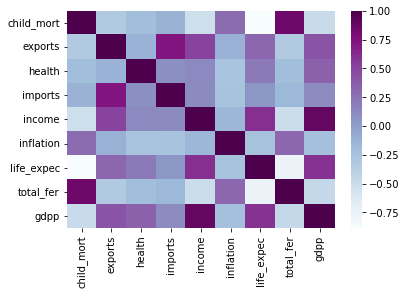

In [ ]:
sns.heatmap(correlation, cmap='BuPu');

In [ ]:
# gdpp & income: 0.895571
# total_fer & child_mort: 0.848478
# life_expec & child_mort: -0.886676

correlation[correlation.apply(lambda x: (abs(x) >= 0.8) & (abs(x) < 1.0))]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,NaN,NaN,NaN,NaN,NaN,NaN,-0.886676,0.848478,NaN
exports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.895571
inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
life_expec,-0.886676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_fer,0.848478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gdpp,NaN,NaN,NaN,NaN,0.895571,NaN,NaN,NaN,NaN


> 💡 **해설 Tip)** <br>
- `gdpp` - `income`: 국가 내에서 생산된 재화, 용역의 시장가치가 GDP에 반영이 되어 있기 때문에, 1인당 GDP와 1인당 순이익은 높은 상관관계를 띈다고 볼 수 있다.<br>
- `total_fer` - `child_mort`: 합계출산율이 높은 국가는 대부분 개발도상국인 경우가 많으며, 해당 국가들의 영유아 사망률 역시 높기 때문에, 높은 상관관계를 보이는 것으로 이해할 수 있다.<br>
- `life_expec` - `child_mort`: 영유아 사망률이 높다는 것은 전체적으로 의료시설이 열악하다는 것으로, 기대수명은 낮아지는 양상을 띌 수 있기 때문에, 높은 음의 상관관계를 보인다고 볼 수 있다.


### `Topic 3`: PCA
> PCA를 통해 데이터의 정보를 최대한 보존하면서 차원을 축소하는 과정을 진행해봅시다.

#### **3-1. 데이터 표준화를 진행하세요.**
- sklearn의 StandardScaler를 활용하여 표준화를 진행하세요.
- 표준화를 진행하는 목적이 무엇인지 함께 생각해보세요.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
aid_scaled = pd.DataFrame(scaler.fit_transform(numeric_aid), columns = numeric_aid.columns)
aid_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


💡 **해설 Tip)**

**표준화를 진행하는 목적**
> 두 변수의 유사한 연관성이라도, 스케일이 큰 변수들은 스케일이 작은 변수들에 비해서 높은 공분산 값을 가지게 됩니다. <br> 다음과 같이 표준화를 수행하여 스케일을 조정할 수 있습니다. <br>
  `column 자신의 평균을 빼고 표준편차로 나누어서 데이터를 평균 0, 표준편차 1로 맞춰준다.`

#### **3-2. 70%의 분산(정보)을 보존하기 위해서는 몇 개의 PC로 차원 축소를 진행해야 하나요?**
- sklearn의 PCA를 사용해보세요.
  - PC 파라미터의 값은 자유롭게 지정해보세요.
- 각 PC 별로 얼만큼의 정보를 가지고 있는지를 나타내는 scree plot을 그려보세요.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4) 
pca.fit(aid_scaled)

pca_aid = pd.DataFrame(pca.transform(aid_scaled), columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_aid

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


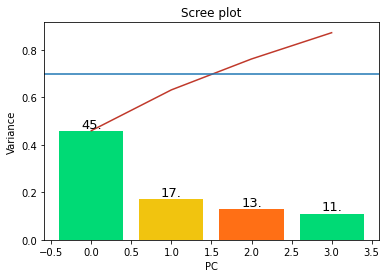

In [ ]:
# scree plot를 그리는 함수 정의 (from lecture note)
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
    plt.axhline(0.7)
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [ ]:
# Scree Plot 시각화에 따라 3개의 그룹으로 군집화 수행
pca = PCA(n_components=3) 
pca.fit(aid_scaled)

pca_aid = pd.DataFrame(pca.transform(aid_scaled), columns=['PC1', 'PC2', 'PC3'])
pca_aid

,PC1,PC2,PC3
0,-2.913025,0.095621,-0.718118
1,0.429911,-0.588156,-0.333486
2,-0.285225,-0.455174,1.221505
3,-2.932423,1.695555,1.525044
4,1.033576,0.136659,-0.225721
...,...,...,...
162,-0.820631,0.639570,-0.389923
163,-0.551036,-1.233886,3.101350
164,0.498524,1.390744,-0.238526
165,-1.887451,-0.109453,1.109752


## **N133 - Clustering**

### 오늘의 목표
- PCA 결과를 바탕으로 Clustering을 진행할 수 있다.
- 우선순위를 어떻게 정의할 것인지에 대해 우리 조의 의견을 정리할 수 있다.
- Clustering 결과로 도출된 Cluster 중 어떤 Cluster를 가장 우선순위로 둘 것인지에 대한 비지니스 인사이트를 도출할 수 있다.

### `Topic 1`: Clustering

#### **1-1. K-Means Clustering을 진행하세요.**
- sklearn의 k-means 알고리즘을 활용하여 PCA를 통해 도출한 데이터셋에 대해 Clustering을 진행하세요.
- Elbow Method와 여러분의 아이디어를 활용하여 몇 개의 Cluster를 만드는 것이 가장 좋을지 생각해봅시다.

In [ ]:
pca_aid = pd.DataFrame(pca.transform(aid_scaled), columns=['PC1', 'PC2', 'PC3'])
pca_aid

,PC1,PC2,PC3
0,-2.913025,0.095621,-0.718118
1,0.429911,-0.588156,-0.333486
2,-0.285225,-0.455174,1.221505
3,-2.932423,1.695555,1.525044
4,1.033576,0.136659,-0.225721
...,...,...,...
162,-0.820631,0.639570,-0.389923
163,-0.551036,-1.233886,3.101350
164,0.498524,1.390744,-0.238526
165,-1.887451,-0.109453,1.109752


In [ ]:
from sklearn.cluster import KMeans

def elbow_method(df):
  inertia = {}
  for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42)
    kmeans.fit(df)
    inertia[k] = kmeans.inertia_
  return inertia

In [ ]:
inertia = elbow_method(pca_aid)
inertia

{1: 1144.3484937500475,
 2: 698.2438120841985,
 3: 549.75396103872,
 4: 441.88138990981383,
 5: 377.78302966773856,
 6: 330.17016413061185,
 7: 284.9874275687873,
 8: 252.96115710873778,
 9: 219.87352799866466}

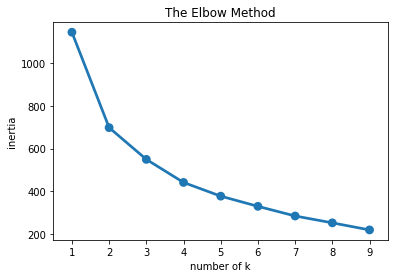

In [ ]:
# Elbow Method 시각화
plt.title('The Elbow Method')
plt.xlabel('number of k')
plt.ylabel('inertia')
sns.pointplot(x=list(inertia.keys()), y=list(inertia.values()), )
plt.show()

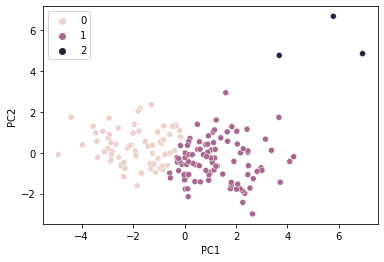

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans.fit(pca_aid)
sns.scatterplot(data=pca_aid, x='PC1', y='PC2', hue=kmeans.labels_);

💡 **해설 Tip)**
> * k가 빠르게 감소하는 구간을 지나면 적절한 k값이 나타납니다. 최적의 k값을 지나치면 k는 매우 천천히 감소합니다. 
* 주의할 점은 elbow method로 최적의 k 값을 도출했더라도 결과만 보는 게 아닌 business 관점에서 몇 개의 그룹으로 나누어야 할지도 고민해보아야 합니다.

#### **1-2. 원본 `aid` 데이터셋에 `cluster` column을 추가하세요.**
- Clustering을 통해 군집화된 데이터의 clusterid를 원본 `aid` 데이터프레임에 `cluster` 라는 이름의 column으로 추가하세요.

In [ ]:
aid['cluster'] = kmeans.labels_
print(aid['cluster'].value_counts())

1    94
0    70
2     3
Name: cluster, dtype: int64


### `Topic 2`: 비지니스 인사이트 도출
> Clustering을 통해 도출한 group 별 특징을 파악하고, 어떤 group을 aid의 우선순위로 둘 것인지 논의해봅시다.

#### **2-1. Cluster 별 특징을 파악해봅시다.**
- Cluster 별로 평균 값을 계산해보고 어떤 차이가 있는지 확인해보세요.
- 우선순위는 어떻게 정의하는 것이 좋을지 함께 논의해보세요.
  - 조금만 도움을 주면 회복할 수 있는 국가
  - 도움을 주지 않으면 상황이 악화될 가능성이 매우 높은 국가


In [ ]:
aid.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,75.055714,30.768557,6.059857,44.318084,4303.328571,10.927643,62.104286,4.359857,2007.914286
1,11.965957,44.504255,7.379255,45.302128,25210.957447,5.608798,76.502128,1.946596,19699.574468
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [ ]:
# cluster 0: 선진국
aid[aid.cluster == 0]['country']

0      Afghanistan
3           Angola
12      Bangladesh
17           Benin
18          Bhutan
          ...     
155         Uganda
161     Uzbekistan
162        Vanuatu
165          Yemen
166         Zambia
Name: country, Length: 70, dtype: object

In [ ]:
# cluster 1: 개발도상국
aid[aid.cluster == 1]['country'].head(30)

1                    Albania
2                    Algeria
4        Antigua and Barbuda
5                  Argentina
6                    Armenia
7                  Australia
8                    Austria
9                 Azerbaijan
10                   Bahamas
11                   Bahrain
13                  Barbados
14                   Belarus
15                   Belgium
16                    Belize
20    Bosnia and Herzegovina
22                    Brazil
23                    Brunei
24                  Bulgaria
29                    Canada
30                Cape Verde
33                     Chile
34                     China
35                  Colombia
39                Costa Rica
41                   Croatia
42                    Cyprus
43            Czech Republic
44                   Denmark
45        Dominican Republic
46                   Ecuador
Name: country, dtype: object

In [ ]:
# cluster 3: GDP 높은 국가 및 경제적으로 부유한 나라
aid[aid.cluster == 2][['country', 'gdpp']]

,country,gdpp
91,Luxembourg,105000
98,Malta,21100
133,Singapore,46600


In [ ]:
# child_mort, health'가 높고 life_expec가 낮은 국가 상위 20개
aid.sort_values(by=['child_mort', 'health', 'life_expec'], ascending=[False, False, True])[['country', 'child_mort', 'health', 'life_expec', 'cluster']].head(20)

,country,child_mort,health,life_expec,cluster
66,Haiti,208.0,6.91,32.1,0
132,Sierra Leone,160.0,13.10,55.0,0
32,Chad,150.0,4.53,56.5,0
31,Central African Republic,149.0,3.98,47.5,0
97,Mali,137.0,4.98,59.5,0
113,Nigeria,130.0,5.07,60.5,0
112,Niger,123.0,5.16,58.8,0
3,Angola,119.0,2.85,60.1,0
37,"Congo, Dem. Rep.",116.0,7.91,57.5,0
25,Burkina Faso,116.0,6.74,57.9,0


**cluster 0** *( cluster 1, 2 와 비교 )*
> * 경제
  - `imports` 대비 `exports` 비율이 **`69.4%`**로 낮다.
    - 수출 대비 수입의 비중이 높은 국가가 집단의 약 **`78.6%`**를 차지하고 있다. <br>(`cluster 1`: 53.2%, `cluster 2`: 33%)
  - 1인당 GDP는 모든 국가 GDP 평균의 **15.5%**에 그친다.
  - 인플레이션율이 **`10.92%`**로 세 집단 중 가장 높은 수치이다.
    - 최적의 인플레이션율은 통상적으로 1~3% 사이
  - `income`은 전체 국가 평균값 대비 **25.1%** 수준으로 현저히 낮다.
    - 이는 `cluster 1(147%)`과는 약 5.85배, `cluster 2(373.5%)`와는 약 15배 가까이 차이가 난다.
  - `cluster 0`에 속한 국가를 보면 다수의 **개발도상국**이 포함되어 있는 것으로 보인다.
* 의료 및 생활
  - 출생률은 `cluster 1` 와 비교해서 약 **6.27배**, `cluster 2`보다는 **1.85배** 높은 양상을 띄고 있다.
  - 반면에 의료비와 예상 수명이 낮고 아동 사망률은 `cluster 1` 보다 **5.28배**, `cluster 2` 와 비교하면 **18.2배** 높다.
  -  그러므로 `cluster 0`은 즉각적인 의료지원이 필요한 그룹으로 보인다.


#### **2-2. 어떤 Cluster를 우선순위로 지원할 것인지 설명해봅시다.**
- 해당 Cluster를 우선순위로 둔 이유에 대해 설명해보세요.


> ex) **cluster 1** 그룹을 우선 지원하는게 필요하다고 생각합니다.
* 가장 시급한 사항인 **의료 및 생활 안정**이 필요한 위한 국가를 우선적으로 지원한다.
* 특히 초반에는 가장 두드러지는 문제인 **아동 사망률**을 낮추는데 집중하는 것으로 시작한다.
* 지원대상국의 의료와 생활이 안정되면 장기적인 지원을 위해 `inflation`과 `income` 정보를 고려하여 **경제적 도움이 필요한 국가**를 선별한다.


## **N134 - Gradient Descent**

### 오늘의 목표
- 경사하강법에서 미분이 어떻게 활용되는지 이해할 수 있다.
- 경사하강 알고리즘이 언제 사용되는지 이해할 수 있다.
- 머신러닝의 지도학습과 비지도학습을 구분할 수 있다.

### `Topic 1`: 경사하강 알고리즘과 미분

#### **1-1. 경사하강 알고리즘에서 미분이 어떻게 활용되는지 설명해봅시다.**
- 경사하강 알고리즘 내 미분이 하는 역할이 무엇인지 정리해보세요.

💡 **해설 Tip)**

> ex) 경사하강법은 비용 함수의 기울기를 구하고 경사의 반대 방향으로 계속 이동시켜 오차를 최소화하는 지점에 이를 때까지 해당 과정을 반복하는 알고리즘이다. 미분을 통해 오차 그래프 상에서 접선의 기울기를 구할 수 있으며 그에 따라 오차를 최소화 하기 위해 기울기의 반대방향으로 나아갈 수 있게된다.

### `Topic 2`: 머신러닝 활용

#### **2-1. 여러분이 관심있는 도메인에서 머신러닝이 어떻게 활용되고 있는지 찾아봅시다.**
- 각자 관심있는 도메인이 있다면 해당 도메인에서 어떻게 머신러닝이 활용되고 있는지 찾아보세요.
- 관심있는 도메인이 없다면, 여러분이 평소 즐겨하는 취미, 방문하는 웹 사이트 등에서부터 시작해보셔도 좋습니다.

💡 **해설 Tip)**
> ### 이커머스
- 개인화 마케팅 전략
    - Clustering을 통한 고객 특성 파악
- 추천 시스템
    - 알고리즘을 통한 맞춤형 제품 추천





> ### 금융 
- 챗봇
    - 24시간 실시간 상담
- 수익 예측 모델링
    - 개인별 수익 포트폴리오 추천
    - 기업 매출 예측
- 사기 탐지
    - 비정상적인 금융 행위를 감지하여 대비



> ### 자동차 
- 자율주행
    - Object Detection
- 최단 경로 탐색
    - 시간대별 정체 상황 파악
    - 도착시간 예측

> ### 헬스케어
- 질병 예측
    - 임상 실험 결과 분석 및 분류
- 소리 인식
    - 수면 패턴 분석을 통해 코골이 인식

### **발표 내용**
- Clustering을 통해 도출한 아래의 질문들에 대한 인사이트를 설명해주세요.
  - 몇 개의 Cluster로 군집화를 진행하는 것이 적절하다고 생각했나요? 그 이유는 무엇인가요?
  - Cluster 별로 어떤 특징을 가지고 있나요?  
  - 어떤 Cluster에 속해있는 국가들을 우선적으로 지원해야 할까요? 그 이유는 무엇인가요?
- N134 `Topic 1`에서 정리한 내용을 설명해주세요.
  - 경사하강 알고리즘에서 미분이 하는 역할은 무엇인가요?